In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### おまじない

In [14]:
sns.set(font='Yu Gothic')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

## 3.8 共変量の役割

### 表3.3 データの読み込み

#### ファイル読み込み

In [99]:
data03 = pd.read_csv('./causality/data03.csv')
data03

,x1,y3,t1,y0t,y1t
0,70,74,1,62,74
1,70,63,0,63,74
2,70,73,1,62,73
3,70,71,1,65,71
4,70,74,1,63,74
5,75,67,0,67,77
6,75,77,1,68,77
7,75,68,0,68,76
8,75,77,1,68,77
9,75,78,1,67,78


#### 要約統計量

In [4]:
data03.describe()

,x1,y3,t1,y0t,y1t
count,20.000000,20.00000,20.000000,20.00000,20.000000
mean,80.000000,77.25000,0.500000,72.20000,82.000000
std,8.111071,7.02533,0.512989,7.56446,7.490345
min,70.000000,63.00000,0.000000,62.00000,71.000000
25%,73.750000,73.75000,0.000000,66.50000,75.500000
50%,80.000000,77.00000,0.500000,71.00000,81.500000
75%,86.250000,82.00000,1.000000,78.75000,88.750000
max,90.000000,91.00000,1.000000,82.00000,92.000000


### 表3.4 分析例

In [7]:
data03.query('t1 == 1')['y3'].mean() - data03.query('t1 == 0')['y3'].mean()

3.3000000000000114

In [8]:
data03['y1t'].mean() - data03['y0t'].mean()

9.799999999999997

## 3.9 共分散分析

### 図3.4

#### A.散布図（全集団）

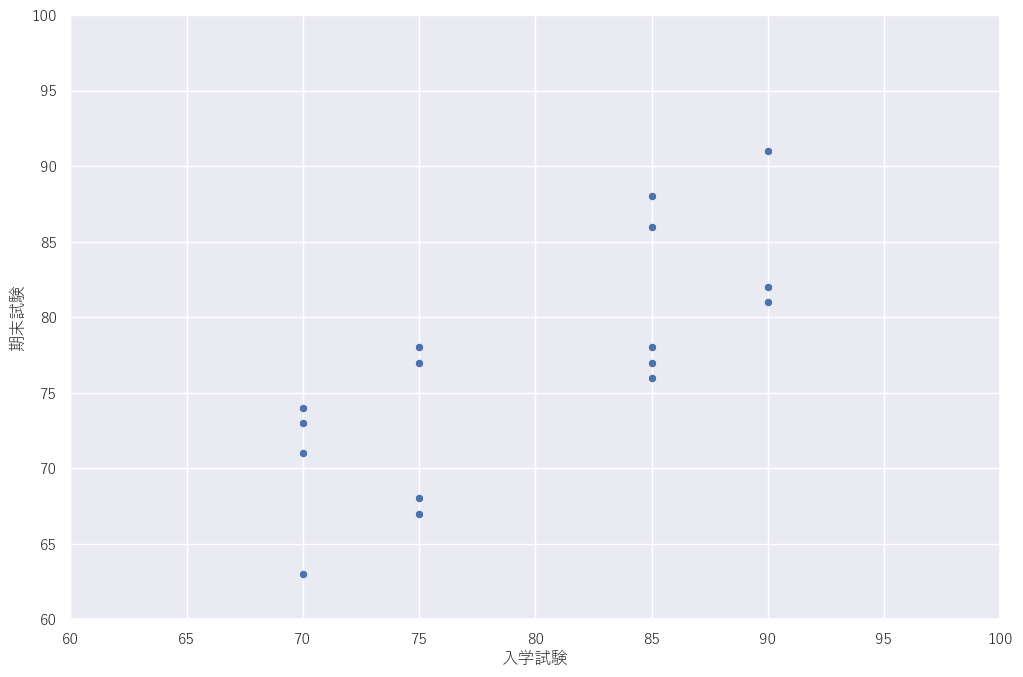

In [70]:
ax = sns.scatterplot(x=data03.x1, y=data03.y3)
_ = ax.set(xlabel='入学試験', ylabel='期末試験', xlim=[60,100], ylim=[60,100])

#### B.回帰直線（全集団）

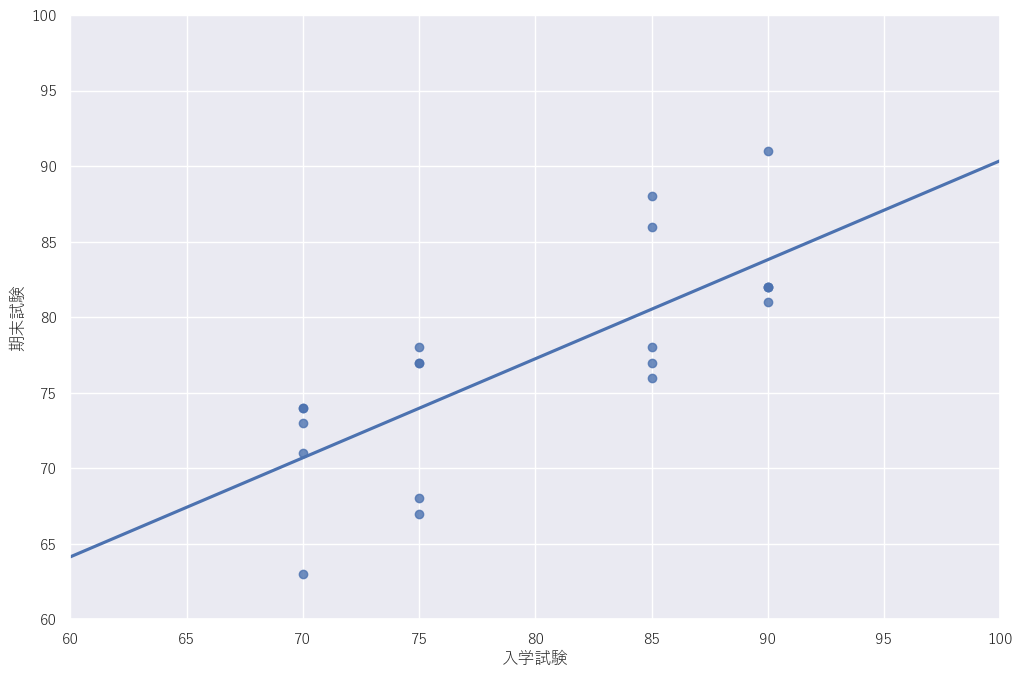

In [76]:
fig, ax = plt.subplots(figsize=(12, 8))

_ = ax.set(xlim=[60,100], ylim=[60,100])
_ = sns.regplot(x=data03.x1, y=data03.y3, ci=None, truncate=False)
_ = ax.set(xlabel='入学試験', ylabel='期末試験', xlim=[60,100], ylim=[60,100])

### 図3.5

#### C.散布図（群ごと）

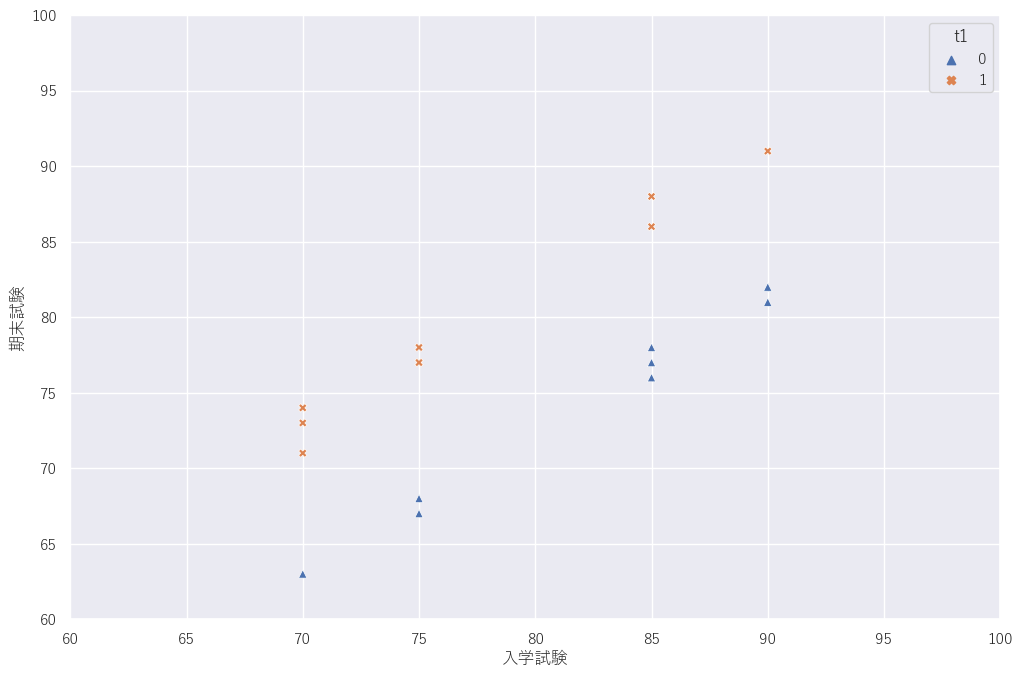

In [77]:
ax = sns.scatterplot(x=data03.x1, y=data03.y3, style=data03.t1, hue=data03.t1, markers=['^', 'X'])
_ = ax.set(xlabel='入学試験', ylabel='期末試験', xlim=[60,100], ylim=[60,100])

#### D.回帰直線（群ごと）

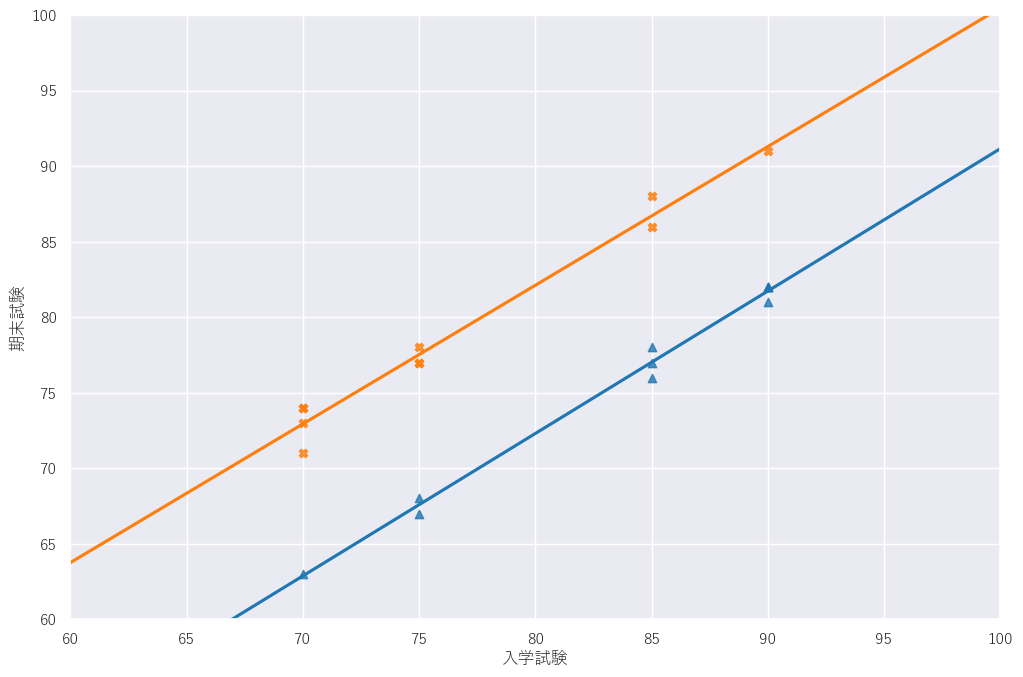

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))

# add the plots for each dataframe
_ = ax.set(xlim=[60,100], ylim=[60,100])
sns.regplot(x='x1', y='y3', data=data03.query('t1==0'), fit_reg=True, ci=None, truncate=False, ax=ax, marker='^', color='tab:blue')
sns.regplot(x='x1', y='y3', data=data03.query('t1==1'), fit_reg=True, ci=None,  truncate=False, ax=ax, marker='X', color='tab:orange')
_ = ax.set(xlabel='入学試験', ylabel='期末試験')

### 表3.5 共分散分析

#### R-like formula

In [87]:
model = smf.ols(formula='y3 ~ x1 + t1', data=data03)
res = model.fit(cov_type='nonrobust')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     629.5
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.15e-16
Time:                        17:15:18   Log-Likelihood:                -23.674
No. Observations:                  20   AIC:                             53.35
Df Residuals:                      17   BIC:                             56.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1256      2.274     -0.935      0.363      -6.924       2.673
x1             0.9308      0.027     34.422      0.000       0.874       0.988
t1             9.8159      0.428     22.957      0.000       8.914      10.718
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   2.387
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.397
Skew:                          -0.283   Prob(JB):                        0.820
Kurtosis:                       2.604   Cond. No.                         958.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Systemフレンドリーなやり方

In [98]:
y = data03['y3']
X = sm.add_constant(data03[['x1', 't1']])
_model = sm.OLS(endog=y, exog=X)
_res = _model.fit(cov_type='nonrobust')
_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     629.5
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.15e-16
Time:                        17:19:47   Log-Likelihood:                -23.674
No. Observations:                  20   AIC:                             53.35
Df Residuals:                      17   BIC:                             56.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1256      2.274     -0.935      0.363      -6.924       2.673
x1             0.9308      0.027     34.422      0.000       0.874       0.988
t1             9.8159      0.428     22.957      0.000       8.914      10.718
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   2.387
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.397
Skew:                          -0.283   Prob(JB):                        0.820
Kurtosis:                       2.604   Cond. No.                         958.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""